<a href="https://colab.research.google.com/github/XavierCarrera/Titanic-Survival/blob/main/Titanic_KaggleChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Problem Definition

[EN]

The Titanic disaster is one of the best know nautical accidents in modern days. Up to 1,635 people perished when it sinked on the North Atlantic Ocean on April 15th 1912. 

In this excercise we analyze data of suvivors in order to make a prediction of which individuals were more likely to survive the disaster. In order to make so, we use the dataset available in Kaggle.

For more information about this excercise and the dataset, visit the following link: https://www.kaggle.com/c/titanic

[ES] 

El desastre del Titanic es uno de los accidentes náuticos más conocido de la era moderna. Hasta 1,635 personas fallecieron cuando se hundió en el Atlántico Norte el 15 de abril de 1912.

En este ejercicio analizamos los datos de los sobrevivientes para hacer una predicción sobre que individuos tenían más posibilidades de sobrevivir al desastere. Para hacer esto, usamos el dataset disponible en Kaggle. 

Para más información sobre este ejercicio y el dataset, visita el siguiente link: https://www.kaggle.com/c/titanic

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

[EN]

The first step is to open the dataset and see the available features. This dataset is divided in two dataframes. One has already the target column "Survived" with the binary values of 0 and 1. The test dataframe lacks such column and is where we'll need to apply the prediction.

[ES]

El primer paso es abrir el dataset y ver las features disponibles. Este dataset está dividido en dos dataframes. Uno ya tiene la columna objetivo "Survived" con los valores binarios de 0 y 1. El dataframe test no tiene esta columna y es donde necesitaremos aplicar la predicción.

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/test.csv")

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

[EN]

At this point we're going to drop the columns that don't provide value to our analysis and model. PassengerID, Name, Ticket and Cabin are specific data to each passanger that provides no statistical value. In the other hand, the ticket fare might be important. In this excercise we'll handle few features. We assume also that the passenger class reflects the passenger's acquisition power.

[ES]

En este punto vamos a eliminar las columnas que no dan valor a nuestro análisis y modelos. PassengerID, Name, Ticket y Cabin son datos específicos a cada pasajero que no dan un valor estadístico. En la otra mano, el costo del boleto puede ser importante. En este ejercicio manejaremos pocas features. También asumimos que la clase del pasajero refleja el poder adquisitivo del pasajero.

In [3]:
train.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
test.drop(["PassengerId","Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [4]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S
...,...,...,...,...,...,...
409,3,female,3.0,1,1,S
411,1,female,37.0,1,0,Q
412,3,female,28.0,0,0,S
414,1,female,39.0,0,0,C


[EN]

For this part we'll keep the following columns:

Pclass: Passenger Class

Sex

Age

SibSp: Number of siblings and spousers traveling with the passenger

Parch: Number of parents and children with the passenger

Embarked: Titanic's passenger embarked from tree ports -- Southampton (England), Cherbourg (France) and Queenstown (Ireland).

[ES]

Para esta parte mantendremos las siguientes columnas:

Pclass: Clase del pasajero

Sex

Age: Edad

SibSp: Número de hermanos y esposos viajando con el pasajero.

Parch: Número de padres u hijos con el pasajero.

Embarked: Los pasajeros del Titanic embarcaron desde tres puertos -- Southampton (Inglaterra), Cherbourg (Francia) y Queenstown (Irlanda). 


# Exploratory Data Analysis

[EN]

We'll do the data analysis divided in two parts. First we'll observe the total passengers. Later we'll analyze the survivors.

[ES]

Haremos un análisis en dos partes de los datos. Primero observaremos los pasajeros totales. Luego analizaremos a los sobrevivientes.

**Passengers Analysis**

In [ ]:
train.Sex.value_counts().sort_values()

female    259
male      453
Name: Sex, dtype: int64

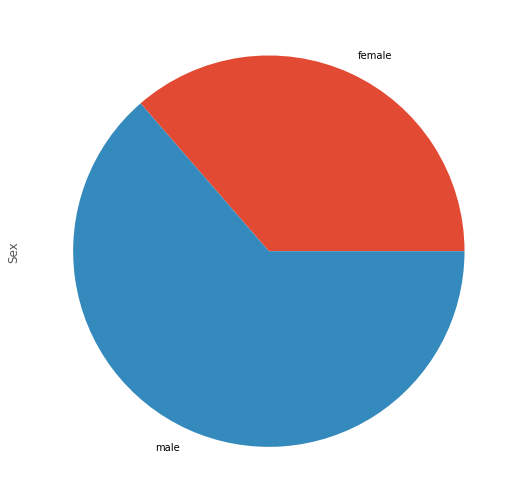

In [7]:
train.Sex.value_counts().sort_values().plot(kind = "pie")

In [ ]:
train.Pclass.value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

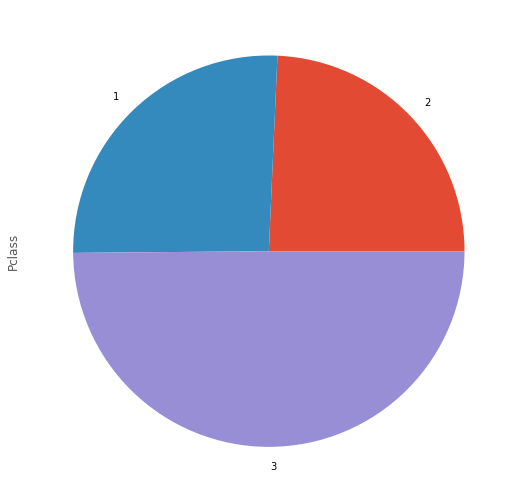

In [9]:
train.Pclass.value_counts().sort_values().plot(kind = "pie")

In [ ]:
train.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

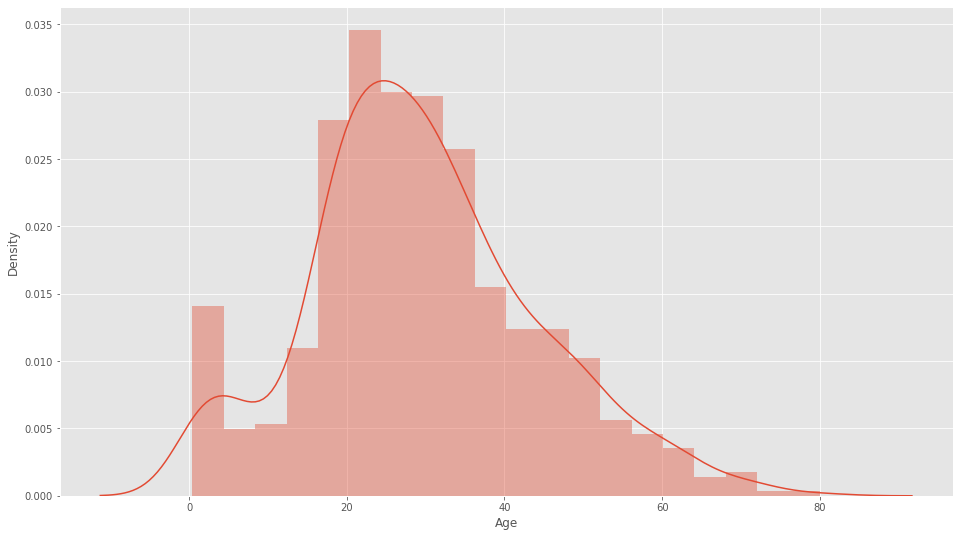

In [ ]:
sns.distplot(train["Age"])

In [ ]:
train.SibSp.value_counts().sort_values()

5      5
3     12
4     18
2     25
1    183
0    469
Name: SibSp, dtype: int64

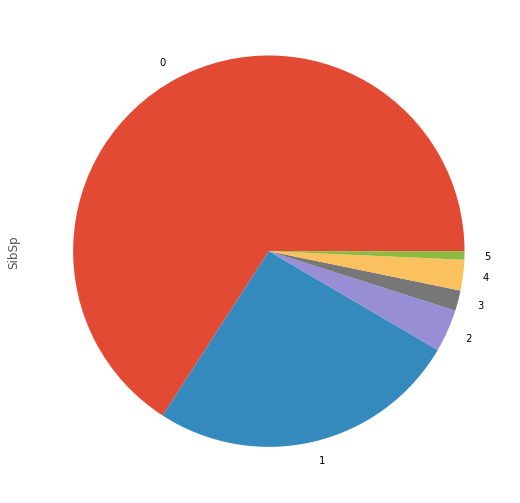

In [10]:
train.SibSp.value_counts().sort_index().plot(kind = "pie")

In [ ]:
train.Parch.value_counts().sort_values()

6      1
4      4
5      5
3      5
2     68
1    110
0    519
Name: Parch, dtype: int64

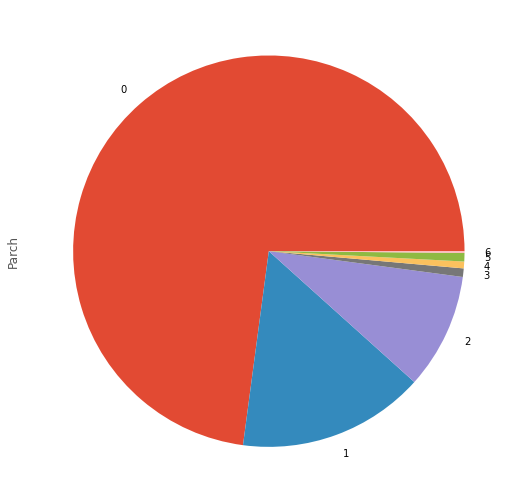

In [11]:
train.Parch.value_counts().sort_index().plot(kind = "pie")

In [ ]:
train.Embarked.value_counts().sort_values()

Q     28
C    130
S    554
Name: Embarked, dtype: int64

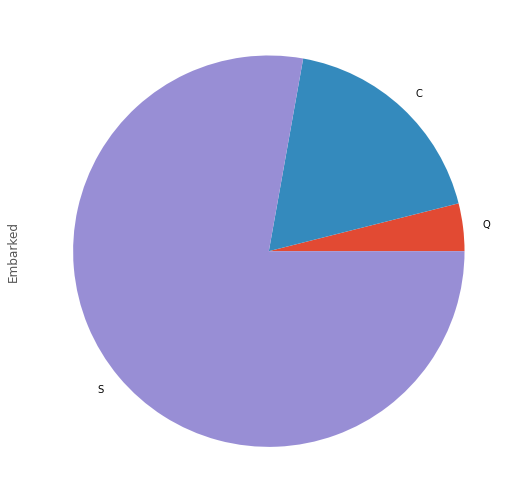

In [12]:
train.Embarked.value_counts().sort_values().plot(kind = "pie")

[EN]

First observation: Most passengers were males.

Second observation: Most passengers traveled on 3rd class, whereas there was a close number between 2nd and 1st class passenger.

Third observation: The interquartile age ranges goes from 20 to 38 years old.

Fourth observation: Most passengers traveled alone, with more than half of them having to family companions.

Fifth observation: Most passengers embarked in Southampton. 

[ES]

Primera observación: La mayoría de los pasajeros eran hombres.

Segunda observación: La mayoría de los pasajeros viajaban en 3ra clase, mientras había un número similar de pasajeros en 2da y 1ra clase.

Tercera observación: El rango intercuartílico de edades va de 20 a 38 años.

Cuarta observación: La mayoría de pasajeros viajaban solos, con más de la mitad que no tenían familiares acompañándolos. 

Quinta observación: La mayoría embarcó en Southampton. 

**Survivors Analysis**

In [14]:
survived = train[train["Survived"] == 1]

In [ ]:
survived.Sex.value_counts().sort_values()

male       93
female    195
Name: Sex, dtype: int64

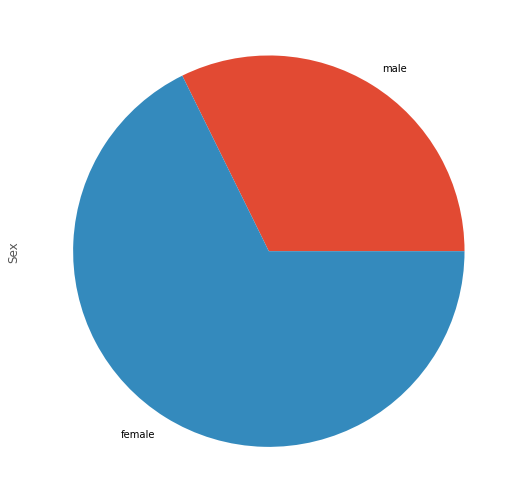

In [15]:
survived.Sex.value_counts().sort_values().plot(kind = "pie")

In [ ]:
survived.Pclass.value_counts().sort_index()

1    120
2     83
3     85
Name: Pclass, dtype: int64

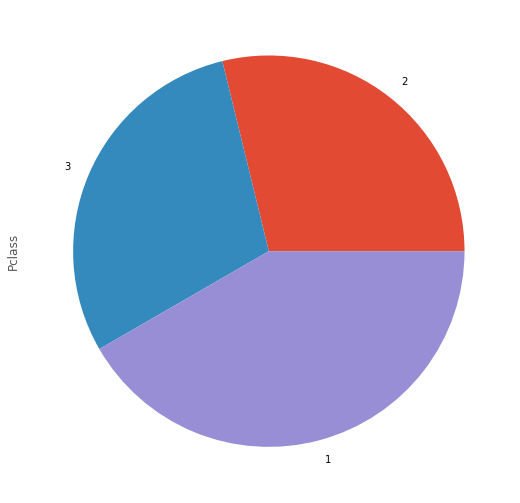

In [16]:
survived.Pclass.value_counts().sort_values().plot(kind = "pie")

In [ ]:
survived.Age.describe()

count    288.000000
mean      28.193299
std       14.859146
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

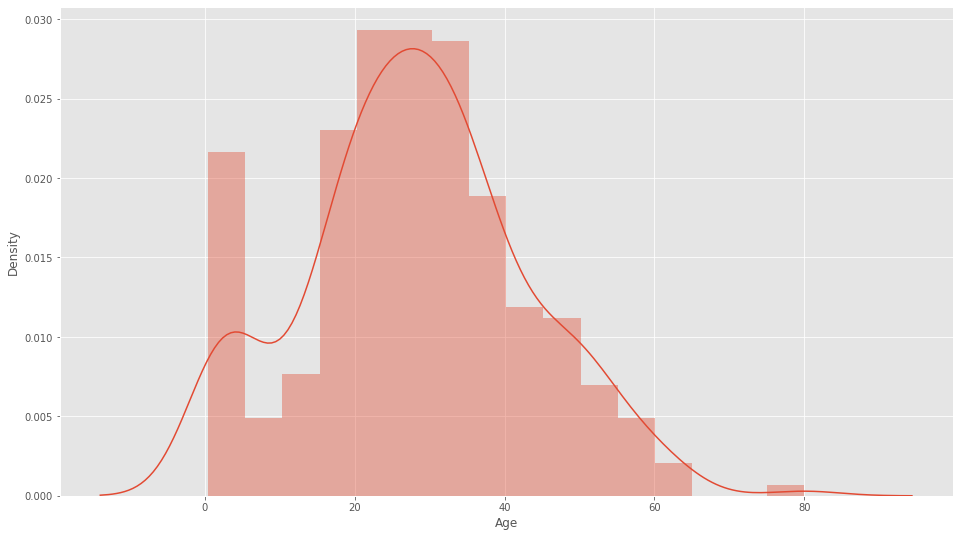

In [ ]:
sns.distplot(survived["Age"])

In [ ]:
survived.SibSp.value_counts().sort_values()

4      3
3      4
2     11
1     97
0    173
Name: SibSp, dtype: int64

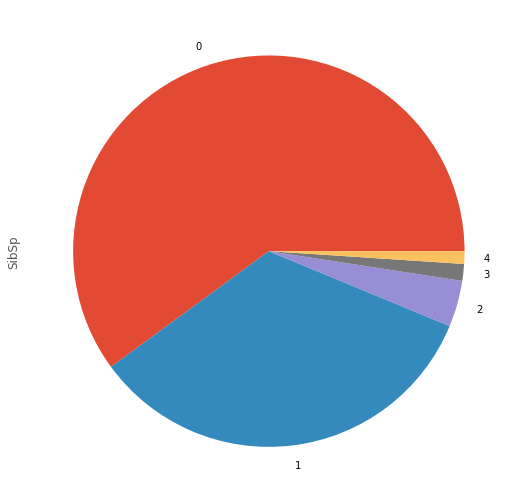

In [17]:
survived.SibSp.value_counts().sort_index().plot(kind = "pie")

In [ ]:
survived.Parch.value_counts().sort_values()

5      1
3      3
2     39
1     61
0    184
Name: Parch, dtype: int64

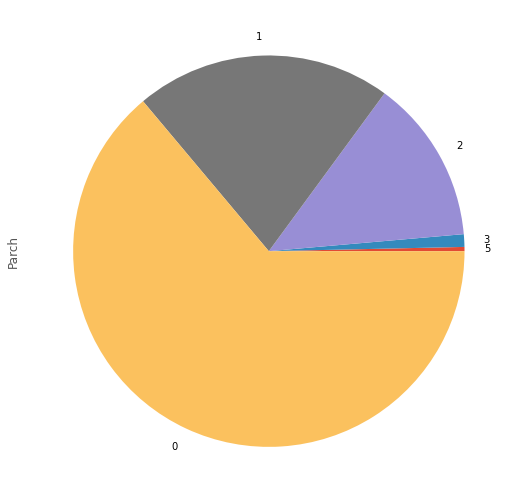

In [18]:
survived.Parch.value_counts().sort_values().plot(kind = "pie")

In [ ]:
survived.Embarked.value_counts().sort_values()

Q      8
C     79
S    201
Name: Embarked, dtype: int64

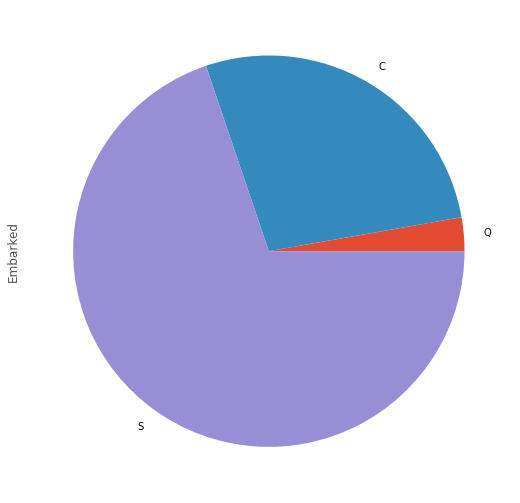

In [19]:
survived.Embarked.value_counts().sort_values().plot(kind = "pie")

**Survivors Chances Analysis**

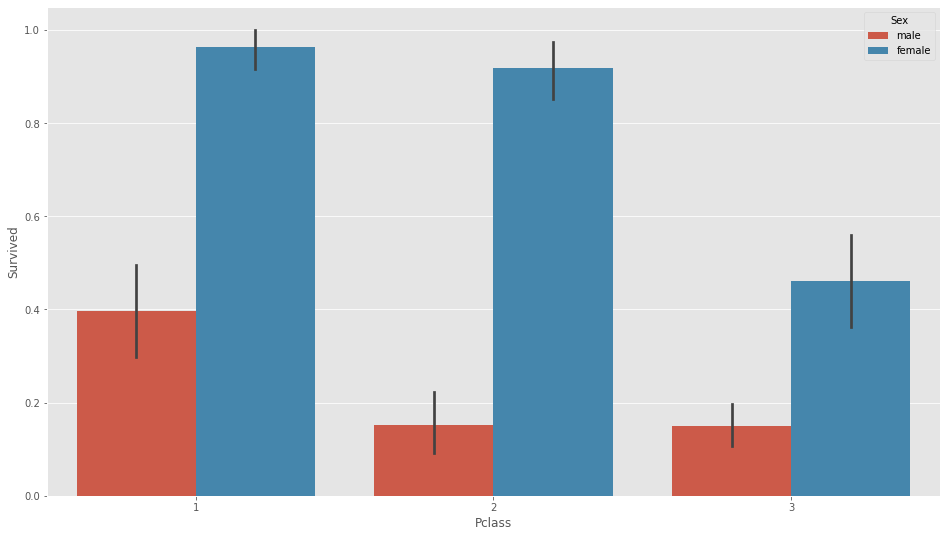

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=train, hue="Sex")

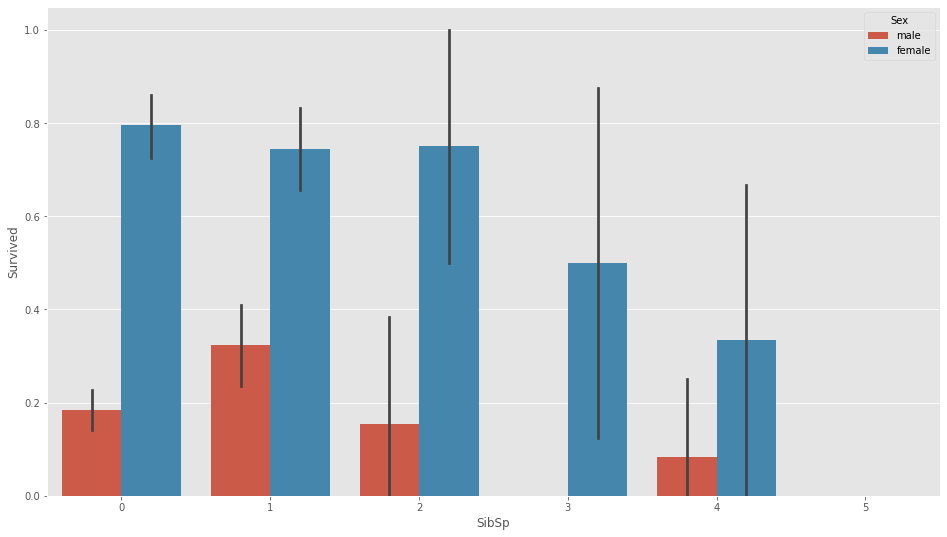

In [ ]:
sns.barplot(x="SibSp", y="Survived", data=train, hue="Sex")

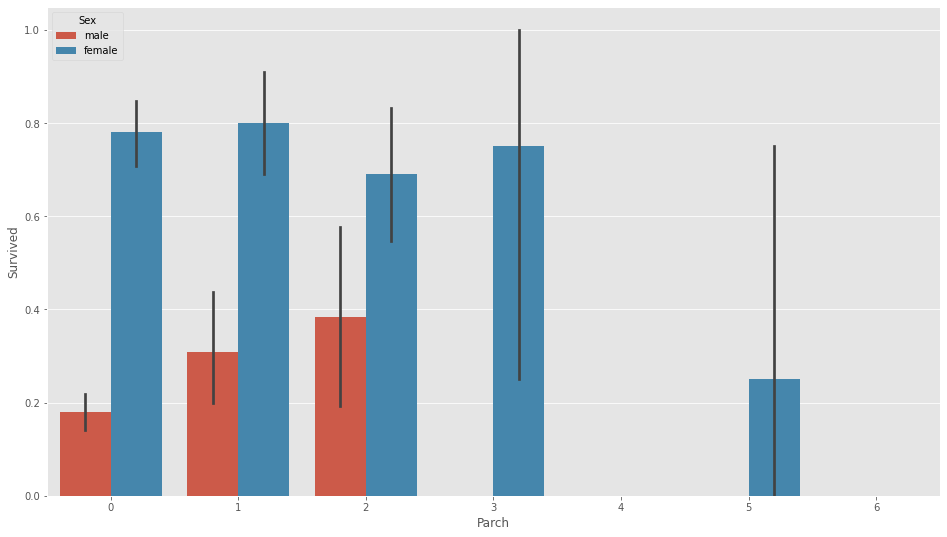

In [ ]:
sns.barplot(x="Parch",y="Survived", data=train, hue="Sex")

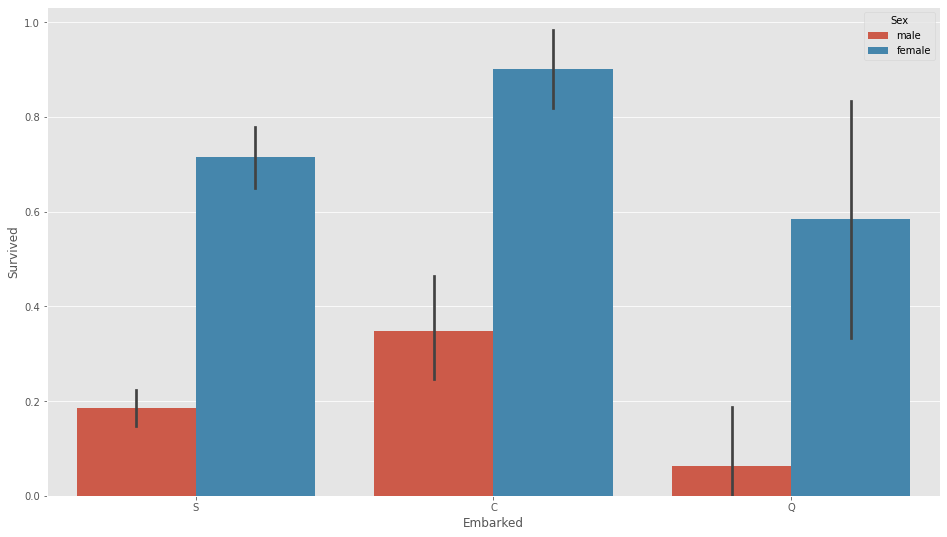

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=train, hue = "Sex")

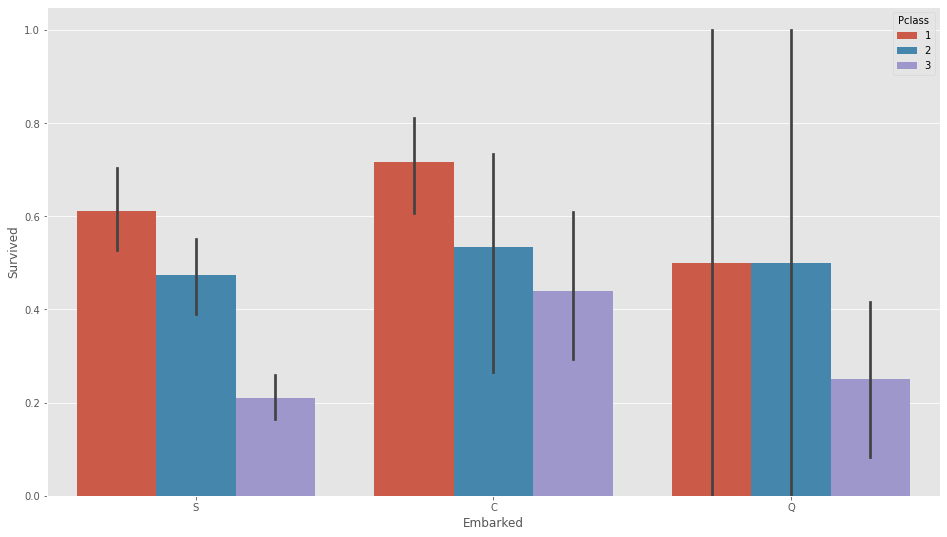

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=train, hue = "Pclass")

[EN]

First observation: Most survivors were women. En 1st and 2nd class, almost all women survived. In 3rd class, less than half of women survived.

Second observation: Although most survivors traveled alone, having 1 or 2 relaties onboard gave good chances to survive among women.

Third observation: Children under 10 y.o. had better chances to survive.

Fourth observation: In general, there was a better survival rate among people who embarked from Cherbourg, France.

[ES]

Primera observación: La mayoría se supervivientes eran mujeres. En 1ra y 2da clase, casi todas las mujeres sobrevivieron. En 3ra clase, menos de la mitad de mujeres sobrevivieron.

Segunda observación: Aunque la mayoría de los sobrevivientes viajaban solos, ir acompañado de 1 o 2 familiares daba una buena oportunidad de sobrevivir entre las mujeres.

Tercera observación: Niños menos de 10 tenían mejores oportunidades de sobrevivir. 

Cuarta observación: En general, hubo una mejor tasa de sobrevivencia entre las personas que embarcaron desde Cherbourg, Francia.



# Feature Engineering

[EN]

In this part we're performing the following:

1) Encoding our categorical features into numerical ones.

2) Spliting our data into train and test.

3) Setting our K-folds for cross-validate our accuracy scores.

[ES]

En esta parte hacemos lo siguiente:

1) Encodeamos nuestros valores catégoricos en numéricos.

2) Dividir nuestros datos en entrenamiento y prueba.

3) Establecer nuestros k-fold para hacer una validación cruzada de nuestros scores de precisión.

In [20]:
model = pd.get_dummies(data = train, columns=["Pclass", "Sex", "Embarked"])
model

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,0,1,0,1,0,0,1
1,1,38.0,1,0,1,0,0,1,0,1,0,0
2,1,26.0,0,0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,1,0,0,1,0,0,0,1
4,0,35.0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,0,0,1,1,0,0,1,0
886,0,27.0,0,0,0,1,0,0,1,0,0,1
887,1,19.0,0,0,1,0,0,1,0,0,0,1
889,1,26.0,0,0,1,0,0,0,1,1,0,0


In [21]:
test_model = pd.get_dummies(data = test, columns=["Pclass", "Sex", "Embarked"])
test_model

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,0,0,1,0,1,0,1,0
1,47.0,1,0,0,0,1,1,0,0,0,1
2,62.0,0,0,0,1,0,0,1,0,1,0
3,27.0,0,0,0,0,1,0,1,0,0,1
4,22.0,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
409,3.0,1,1,0,0,1,1,0,0,0,1
411,37.0,1,0,1,0,0,1,0,0,1,0
412,28.0,0,0,0,0,1,1,0,0,0,1
414,39.0,0,0,1,0,0,1,0,1,0,0


In [22]:
X = model.drop(["Survived"], axis = 1)
y = model["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Model Training

[EN]

In this part, we're going to use four algorithms to train our model. We'll then calculate the mean value among the cross-validated scores to determine which one of them is best to predict.

[ES]

En esta parte, vamos a usar cuatro algoritmos para entrenar nuestro modelo. Calcularemos el valor promedio entre los scores con validación cruzada para determinar cual es el mejor para predecir.

**Logistic Regression**

In [ ]:
clf = LogisticRegression(random_state = 40).fit(X, y)
score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(score)

[0.77777778 0.84722222 0.69014085 0.84507042 0.83098592 0.83098592
 0.73239437 0.8028169  0.77464789 0.83098592]


In [ ]:
score.mean()

0.7963028169014086

**Decision Tree**

In [ ]:
clf = tree.DecisionTreeClassifier().fit(X, y)
score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(score)

[0.80555556 0.79166667 0.64788732 0.78873239 0.73239437 0.8028169
 0.77464789 0.83098592 0.8028169  0.77464789]


In [ ]:
score.mean()

0.7752151799687013

**K-Nearest Neighbors**

In [ ]:
clf = KNeighborsClassifier().fit(X, y)
score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(score)

[0.80555556 0.83333333 0.67605634 0.83098592 0.77464789 0.76056338
 0.74647887 0.81690141 0.77464789 0.83098592]


In [ ]:
score.mean()

0.7850156494522692

**Random Forest Classifier**

In [ ]:
clf = RandomForestClassifier(n_estimators=13).fit(X, y)
score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(score)

[0.81944444 0.86111111 0.61971831 0.84507042 0.74647887 0.81690141
 0.78873239 0.8028169  0.78873239 0.77464789]


In [ ]:
score.mean()

0.7863654147104852

**Confusion Matrix**

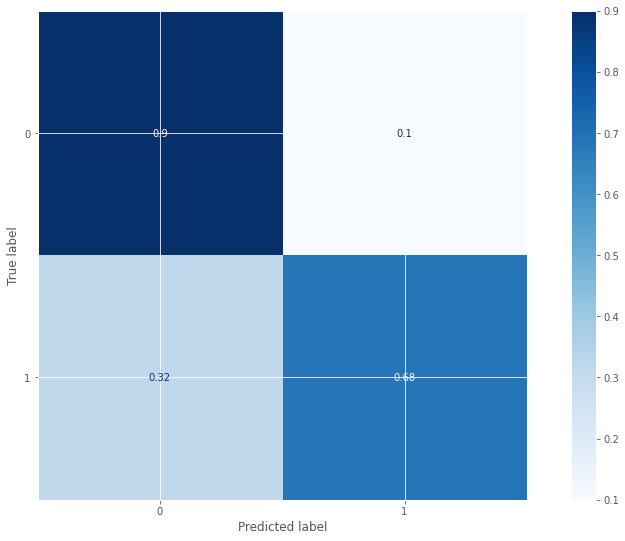

In [27]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show(matrix)
plt.show()

[EN]

The logistic regression algorithm was the best performing approach to our problem. When applying a confusion matrix, however, we can start seeing that our model was better predicting non-survivors than survivors. 

[ES]

El algoritmo de regresion logística fue el que tuvo el mejor desempeño a nuestro problema. Al aplicar una matriz de confusión, sin embaergo, podemos ver que nuestro modelo predijo mejor a los no-supervivientes que a los supervivients.

**Prediction**

In [23]:
clf = LogisticRegression(random_state = 40).fit(X, y)
test_model["Survived"] = clf.predict(test_model)

test_model

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,34.5,0,0,0,0,1,0,1,0,1,0,0
1,47.0,1,0,0,0,1,1,0,0,0,1,0
2,62.0,0,0,0,1,0,0,1,0,1,0,0
3,27.0,0,0,0,0,1,0,1,0,0,1,0
4,22.0,1,1,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409,3.0,1,1,0,0,1,1,0,0,0,1,1
411,37.0,1,0,1,0,0,1,0,0,1,0,1
412,28.0,0,0,0,0,1,1,0,0,0,1,1
414,39.0,0,0,1,0,0,1,0,1,0,0,1


# Model Evaluation

[EN]

In order to evaluate our predictions, we're going to 
statistically compare the data of survivors with our prediction.

Although we shouldn't expect exactly the same values, the precission of our model can be assessed by how similar it is to the original data. 

[ES]

Para evaluar nuestras predicciones, vamos a comparar estadísticamente los datos de los sobrevivientes con nuestra predicción.

A pesar de que no debemos esperar exactamente los mismos valores, la precisión de nuestro modelo se puede evaluar por que tan similar es a nuestra data original. 

In [30]:
result = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/test.csv")
result.drop(["PassengerId","Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
result.dropna(inplace=True)
result["Survived"] = test_model["Survived"]
result = result[result.Survived != 0]


In [ ]:
result

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
4,3,female,22.0,1,1,S,1
6,3,female,30.0,0,0,Q,1
8,3,female,18.0,0,0,C,1
12,1,female,23.0,1,0,S,1
14,1,female,47.0,1,0,S,1
...,...,...,...,...,...,...,...
403,1,male,17.0,0,0,S,1
409,3,female,3.0,1,1,S,1
411,1,female,37.0,1,0,Q,1
412,3,female,28.0,0,0,S,1


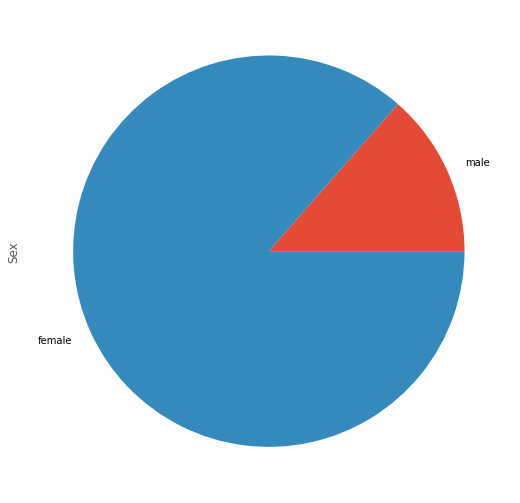

In [31]:
result.Sex.value_counts().sort_values().plot(kind = "pie")

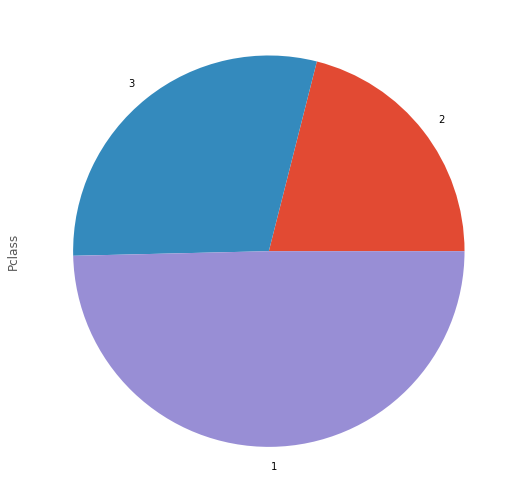

In [32]:
result.Pclass.value_counts().sort_values().plot(kind = "pie")

In [ ]:
result.Age.describe()

count    133.000000
mean      29.214962
std       14.880651
min        0.170000
25%       20.000000
50%       27.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64

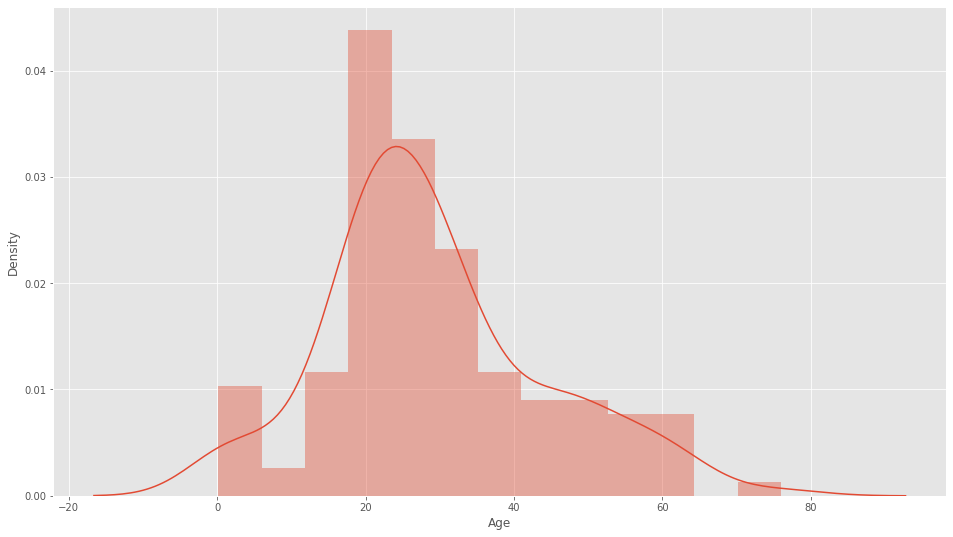

In [ ]:
sns.distplot(result["Age"])

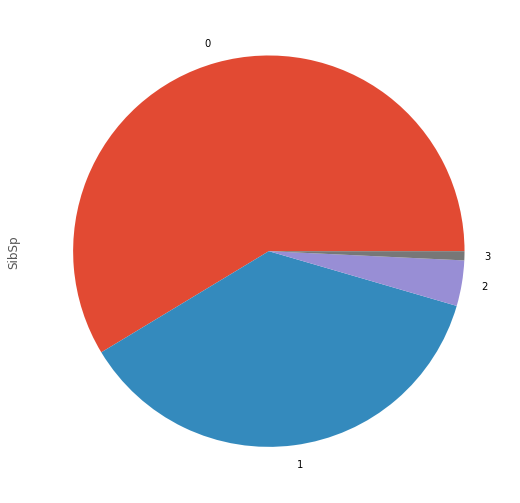

In [33]:
result.SibSp.value_counts().sort_index().plot(kind = "pie")

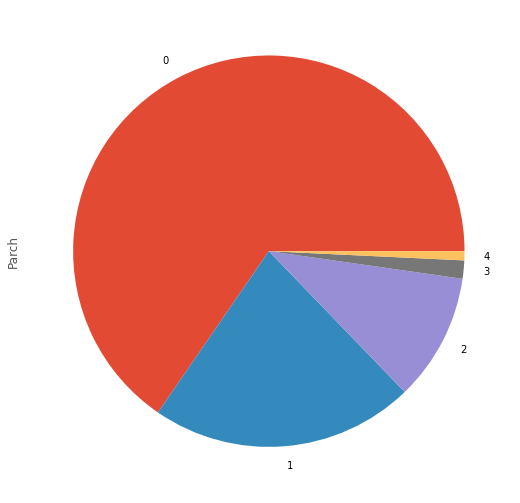

In [34]:
result.Parch.value_counts().sort_index().plot(kind = "pie")

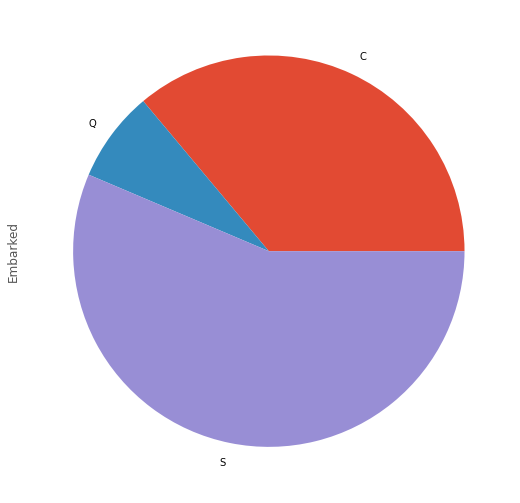

In [35]:
result.Embarked.value_counts().sort_index().plot(kind = "pie")

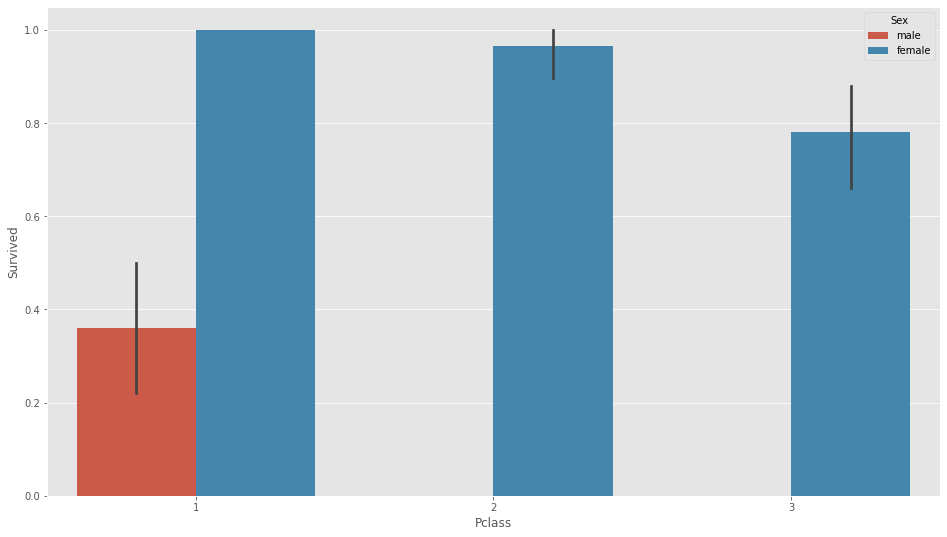

In [ ]:
pre = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/test.csv")
pre.drop(["PassengerId","Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
pre.dropna(inplace=True)
pre["Survived"] = test_model["Survived"]
sns.barplot(x="Pclass", y="Survived", data=pre, hue="Sex")

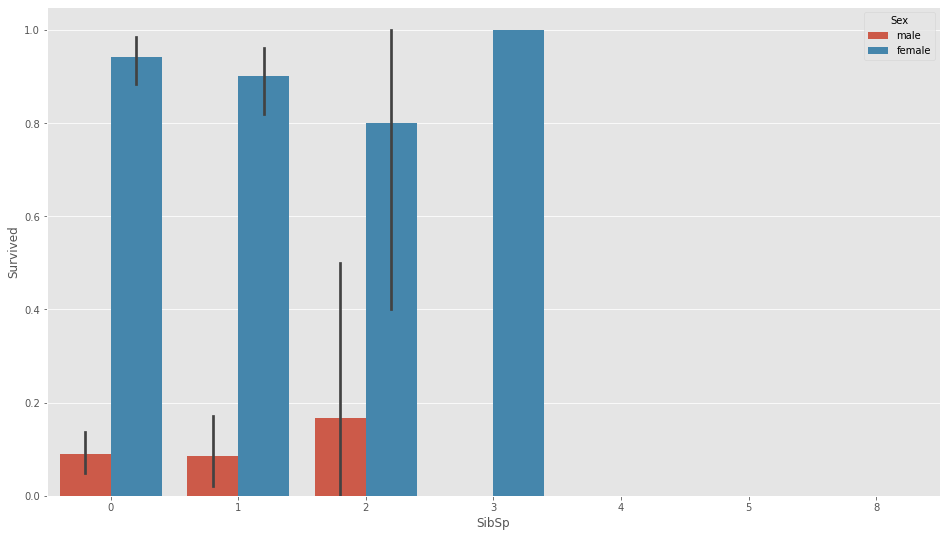

In [ ]:
sns.barplot(x="SibSp", y="Survived", data=pre, hue="Sex")

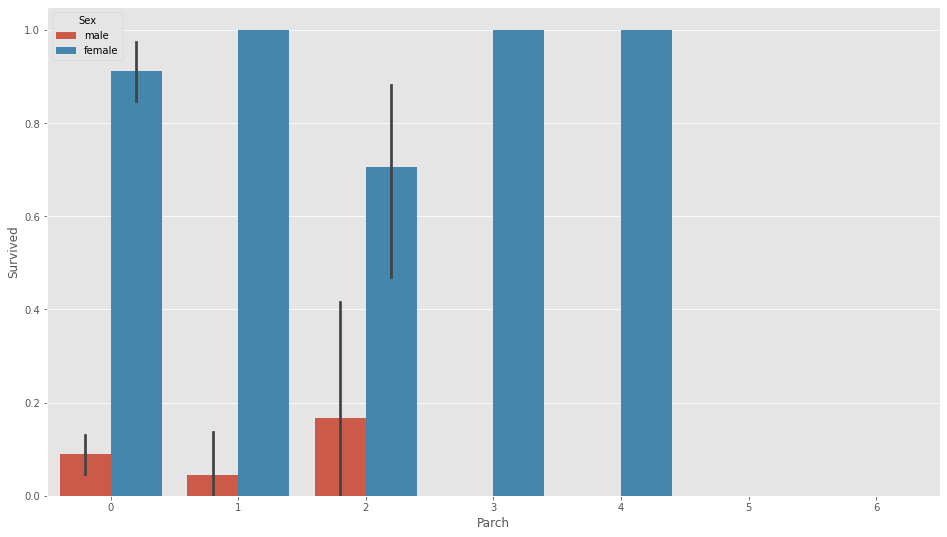

In [ ]:
sns.barplot(x="Parch", y="Survived", data=pre, hue="Sex")

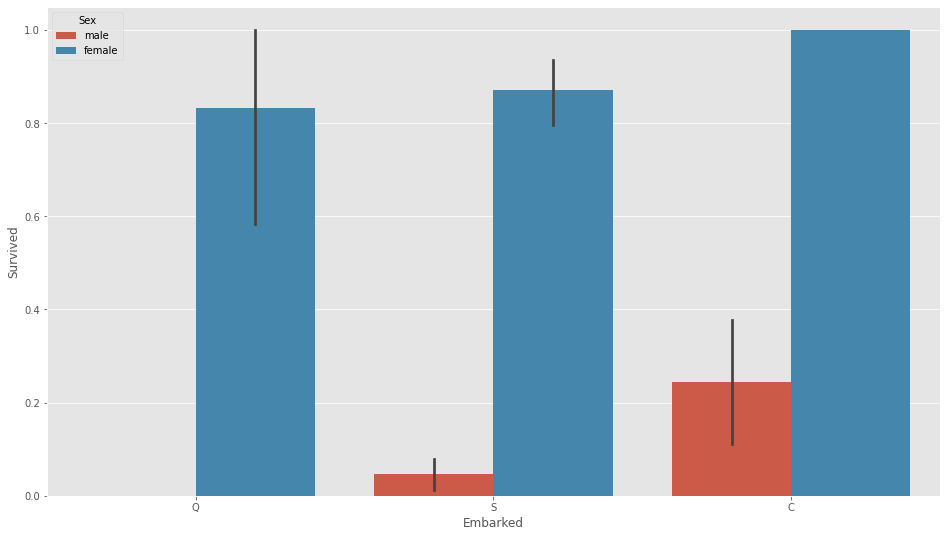

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=pre, hue="Sex")

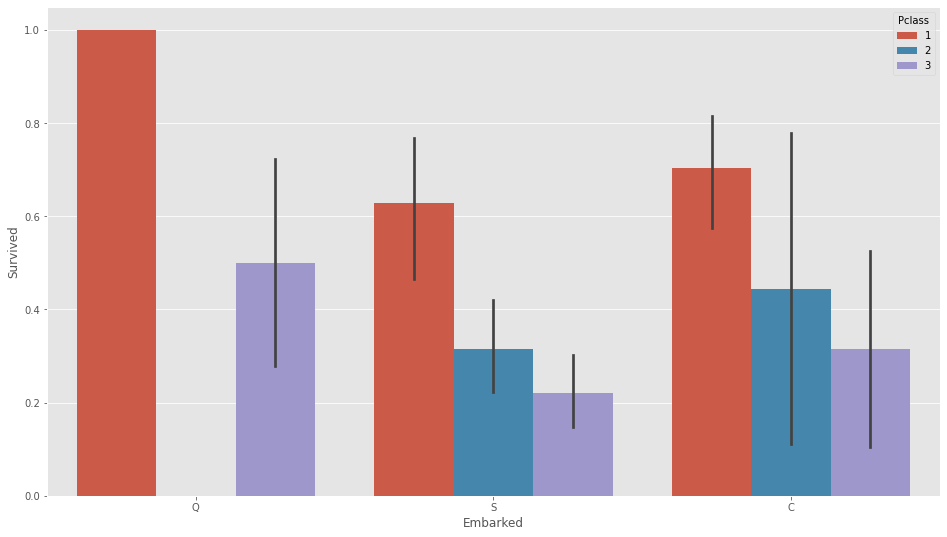

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=pre, hue = "Pclass")

[EN]

First observation: Our model focused on survivors who were women and were traveling in 1st class. However, the model differs on the proportion of male survivors and the difference between 2nd and 3rd class ones.

Second observation: The age ranges are quite similar between the actual data and predicted values. The main difference is regrading children under 10 y.o., who are less represented by our model.

Third observation: Our model benefited passengers traveling with relatives.

Fourth observation: Our model didn't took much into consideration the place of embarkation. 

[ES]

Primera observación: Nuestro modelo se concentró en los supervivientes que eran mujeres y viajaban en 1ra clase. Sin embargo, el modelo difiere con la proporción de supervivientes de 2da y 3ra clase. 

Segunda observación: Los rangos de edad son bastante similares entre los datos y los valores predecidos. La mayor diferencia es respecto a los niños menos de 10, que están menos representados por nuestro modelo.

Tercera observación: Nuestro modelo benefició a los pasajeros que viajaron con familiares.

Cuarta observación: Nuestro modelo no tomo demasiado en cuenta el lugar de embarcación. 